# Analysis of Protein Binding Genome and classifying them

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Dna_seq=pd.read_excel(r"C:\Users\Desktop\DNA-seq.xlsx")

In [3]:
Dna_Label=pd.read_excel(r"C:\Users\Desktop\DNA-label.xlsx")

In [4]:
protein_seq=pd.concat([Dna_seq,Dna_Label],axis=1)

In [5]:
protein_seq.head()

,sequence,Label
0,CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGA...,0
1,GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGC...,0
2,GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTA...,0
3,GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGC...,1
4,GGCGACCGAACTCCAACTAGAACCTGCATAACTGGCCTGGGAGATA...,1


# Data Visualization

Text(0.5, 1.0, 'Class distribution of DNA binding proteins')

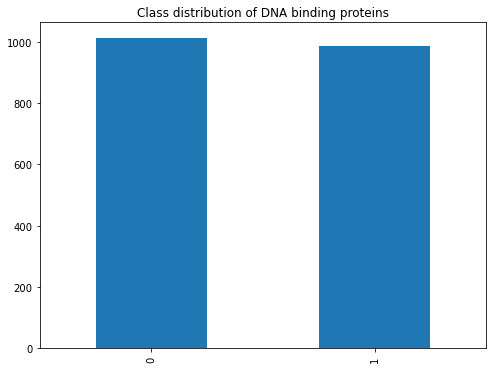

In [6]:
plt.figure(figsize=(8,6))
protein_seq['Label'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of DNA binding proteins")

# Data preprocessing

In [7]:
sequence = list(protein_seq['sequence'])
encoded_list = []

In [44]:
def encode_seq(s):
    Encode = {'A':[1,0,0,0],'T':[0,1,0,0],'C':[0,0,1,0],'G':[0,0,0,1]}
    return [Encode[x] for x in s]

for i in sequence:
    x = encode_seq(i)
    encoded_list.append(x)

X = np.array(encoded_list)
X.shape
X

array([[[0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        ...,
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0]],

       [[0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 0, 0, 1],
        ...,
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]],

       [[0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        ...,
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0]],

       ...,

       [[1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        ...,
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0]],

       [[0, 1, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        ...,
        [0, 0, 0, 1],
        [1, 0, 0, 0],
        [1, 0, 0, 0]],

       [[1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        ...,
        [0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 0, 1, 0]]])

In [9]:
y = protein_seq['Label']
y

0       0
1       0
2       0
3       1
4       1
       ..
1995    0
1996    1
1997    0
1998    1
1999    1
Name: Label, Length: 2000, dtype: int64

In [10]:
import pandas as pd
import numpy as np
import os
import tensorflow
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, MaxPooling2D, Conv2D, LSTM, GRU, Bidirectional
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [11]:
X_train, X_test, y_train, y_test_y = train_test_split(X, y,test_size=0.2,random_state=42)

In [12]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test_y)

# Training Models
## Convolutional Neural Network(CNN)

In [13]:
cnn= Sequential()
cnn.add(Conv1D(filters = 27, kernel_size = (4), activation = 'relu', input_shape = (50,4)))
cnn.add(MaxPooling1D(pool_size= (3)))
cnn.add(Flatten())
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dense(64, activation = 'relu'))
cnn.add(Dense(2, activation = 'sigmoid'))
cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnn.fit(X_train, y_train, batch_size = 128, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 46ms/step - loss: 0.6864 - accuracy: 0.5606 - val_loss: 0.6643 - val_accuracy: 0.7075
Epoch 2/10
13/13 [==============================] - 0s 13ms/step - loss: 0.6285 - accuracy: 0.7550 - val_loss: 0.5902 - val_accuracy: 0.7650
Epoch 3/10
13/13 [==============================] - 0s 13ms/step - loss: 0.5236 - accuracy: 0.7975 - val_loss: 0.4708 - val_accuracy: 0.8150
Epoch 4/10
13/13 [==============================] - 0s 13ms/step - loss: 0.4036 - accuracy: 0.8500 - val_loss: 0.3864 - val_accuracy: 0.8300
Epoch 5/10
13/13 [==============================] - 0s 13ms/step - loss: 0.3371 - accuracy: 0.8675 - val_loss: 0.3387 - val_accuracy: 0.8650
Epoch 6/10
13/13 [==============================] - 0s 14ms/step - loss: 0.2640 - accuracy: 0.9013 - val_loss: 0.2957 - val_accuracy: 0.8825
Epoch 7/10
13/13 [==============================] - 0s 13ms/step - loss: 0.2171 - accuracy: 0.9231 - val_loss: 0.2445 - val_accuracy: 0.8950
Epoch 8/10
13

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 47, 27)            459       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 27)            0         
_________________________________________________________________
flatten (Flatten)            (None, 405)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               51968     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 60,813
Trainable params: 60,813
Non-trainable params: 0
____________________________________________________

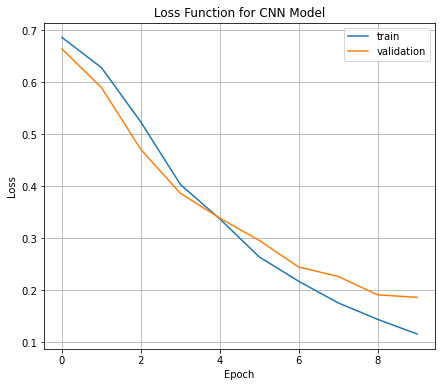

In [15]:
plt.figure(figsize=(7,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss Function for CNN Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

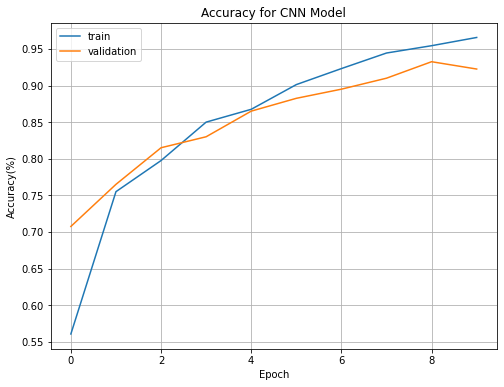

In [16]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.grid(True)
plt.title('Accuracy for CNN Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy(%)')
plt.legend()

In [17]:
yhat_probs  = cnn.predict(X_test)
yhat_classes =cnn.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test_y, yhat_classes)
precision = precision_score(y_test_y, yhat_classes)
recall = recall_score(y_test_y, yhat_classes)
f1 = f1_score(y_test_y, yhat_classes)

In [19]:
print(' Classification Metrics for CNN:')
print('-------------------------------------------')
print('Accuracy  :',accuracy)
print('Precision :',precision)
print('Recall    :',recall)
print('f1        :',f1)
print('-------------------------------------------')

 Classification Metrics for CNN:
-------------------------------------------
Accuracy  : 0.9225
Precision : 0.9505494505494505
Recall    : 0.8871794871794871
f1        : 0.9177718832891246
-------------------------------------------


# CNN + LSTM

In [20]:
lstm = Sequential()
lstm.add(Conv1D(filters = 27, kernel_size = (4), activation = 'relu', input_shape = (50,4)))
lstm.add(MaxPooling1D(pool_size= (3)))
lstm.add(Conv1D(filters = 14, kernel_size = (2), activation = 'relu', padding = 'same'))
lstm.add(MaxPooling1D(pool_size= (2)))
lstm.add(LSTM(128, activation = 'relu'))
lstm.add(Dense(64, activation = 'relu'))
lstm.add(Dense(16, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
lstm.add(Dense(2, activation = 'sigmoid'))
lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = lstm.fit(X_train, y_train, batch_size = 128, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 72ms/step - loss: 0.9306 - accuracy: 0.5213 - val_loss: 0.9100 - val_accuracy: 0.5800
Epoch 2/10
13/13 [==============================] - 0s 35ms/step - loss: 0.8928 - accuracy: 0.6044 - val_loss: 0.8668 - val_accuracy: 0.6525
Epoch 3/10
13/13 [==============================] - 0s 35ms/step - loss: 0.8299 - accuracy: 0.7412 - val_loss: 0.7491 - val_accuracy: 0.8175
Epoch 4/10
13/13 [==============================] - 0s 35ms/step - loss: 0.6554 - accuracy: 0.8037 - val_loss: 0.5809 - val_accuracy: 0.8100
Epoch 5/10
13/13 [==============================] - 0s 38ms/step - loss: 0.4995 - accuracy: 0.8487 - val_loss: 0.5223 - val_accuracy: 0.8375
Epoch 6/10
13/13 [==============================] - 0s 38ms/step - loss: 0.4159 - accuracy: 0.8756 - val_loss: 0.3594 - val_accuracy: 0.9125
Epoch 7/10
13/13 [==============================] - 0s 36ms/step - loss: 0.3159 - accuracy: 0.9237 - val_loss: 0.2626 - val_accuracy: 0.9375
Epoch 8/10
13

In [21]:
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 47, 27)            459       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 27)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 14)            770       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7, 14)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               73216     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 16)               

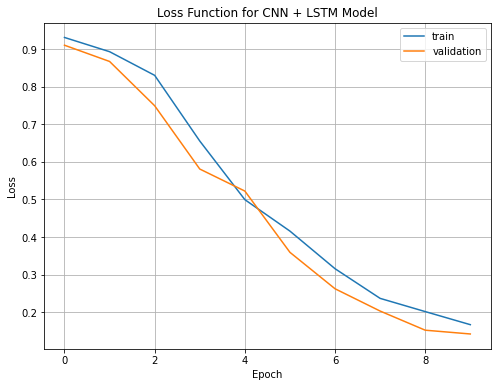

In [22]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss Function for CNN + LSTM Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

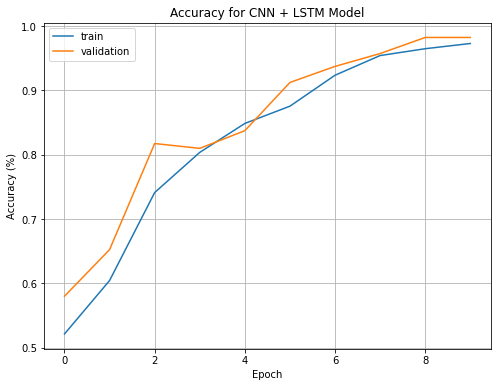

In [23]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.grid(True)
plt.title('Accuracy for CNN + LSTM Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

In [34]:
yhat_probs  = lstm.predict(X_test)
yhat_classes =lstm.predict_classes(X_test)

In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test_y, yhat_classes)
precision = precision_score(y_test_y, yhat_classes)
recall = recall_score(y_test_y, yhat_classes)
f1 = f1_score(y_test_y, yhat_classes)

In [36]:
print('      Classification Metrics for CNN-LSTM:')
print('-------------------------------------------')
print('Accuracy  :',accuracy)
print('Precision :',precision)
print('Recall    :',recall)
print('f1        :',f1)
print('-------------------------------------------')

      Classification Metrics for CNN-LSTM:
-------------------------------------------
Accuracy  : 0.9825
Precision : 0.9947368421052631
Recall    : 0.9692307692307692
f1        : 0.9818181818181819
-------------------------------------------


# CNN + Bidirectional LSTM

In [37]:
Bi_lstm=Sequential()
Bi_lstm.add(Conv1D(filters = 27, kernel_size = (4), activation = 'relu', input_shape = (50, 4)))
Bi_lstm.add(MaxPooling1D(pool_size= (3)))
Bi_lstm.add(Conv1D(filters = 14, kernel_size = (2), activation = 'relu', padding = 'same'))
Bi_lstm.add(MaxPooling1D(pool_size= (2)))
Bi_lstm.add(Bidirectional(LSTM(128, activation = 'relu')))
Bi_lstm.add(Dense(128, activation = 'relu'))
Bi_lstm.add(Dense(64, activation = 'relu'))
Bi_lstm.add(Dense(16, activation = 'relu',kernel_regularizer = regularizers.l2(0.01)))
Bi_lstm.add(Dense(2, activation = 'sigmoid'))
Bi_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = Bi_lstm.fit(X_train, y_train, batch_size =128, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
13/13 [==============================] - 2s 125ms/step - loss: 0.9225 - accuracy: 0.5913 - val_loss: 0.8964 - val_accuracy: 0.7725
Epoch 2/10
13/13 [==============================] - 1s 44ms/step - loss: 0.8634 - accuracy: 0.7569 - val_loss: 0.7995 - val_accuracy: 0.8000
Epoch 3/10
13/13 [==============================] - 1s 44ms/step - loss: 0.6819 - accuracy: 0.8369 - val_loss: 0.5152 - val_accuracy: 0.8275
Epoch 4/10
13/13 [==============================] - 1s 42ms/step - loss: 0.4509 - accuracy: 0.8775 - val_loss: 0.3774 - val_accuracy: 0.8925
Epoch 5/10
13/13 [==============================] - 1s 45ms/step - loss: 0.3205 - accuracy: 0.9350 - val_loss: 0.2541 - val_accuracy: 0.9575
Epoch 6/10
13/13 [==============================] - 1s 51ms/step - loss: 0.2403 - accuracy: 0.9556 - val_loss: 0.1884 - val_accuracy: 0.9750
Epoch 7/10
13/13 [==============================] - 1s 45ms/step - loss: 0.1626 - accuracy: 0.9862 - val_loss: 0.1370 - val_accuracy: 0.9850
Epoch 8/10
1

In [38]:
Bi_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 47, 27)            459       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 15, 27)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 15, 14)            770       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 7, 14)             0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               146432    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 64)               

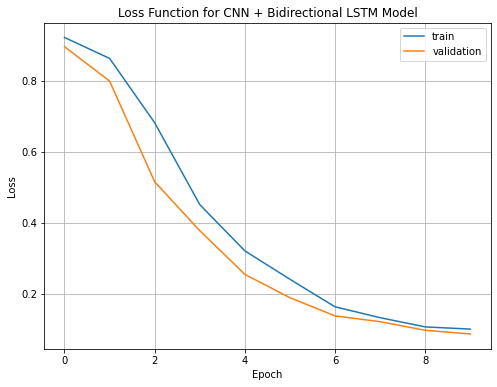

In [39]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss Function for CNN + Bidirectional LSTM Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

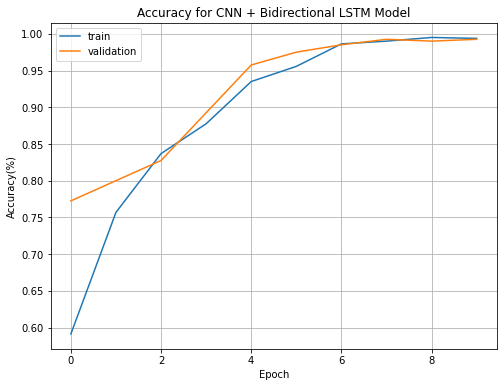

In [40]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.grid(True)
plt.title('Accuracy for CNN + Bidirectional LSTM Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy(%)')
plt.legend()

In [41]:
yhat_probs  = Bi_lstm.predict(X_test)
yhat_classes =Bi_lstm.predict_classes(X_test)

In [42]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test_y, yhat_classes)
precision = precision_score(y_test_y, yhat_classes)
recall = recall_score(y_test_y, yhat_classes)
f1 = f1_score(y_test_y, yhat_classes)

In [43]:
print(' Classification Metrics for CNN-Bidirectional LSTM:')
print('-------------------------------------------')
print('Accuracy  :',accuracy)
print('Precision :',precision)
print('Recall    :',recall)
print('f1        :',f1)
print('-------------------------------------------')

 Classification Metrics for CNN-Bidirectional LSTM:
-------------------------------------------
Accuracy  : 0.9925
Precision : 0.9848484848484849
Recall    : 1.0
f1        : 0.9923664122137404
-------------------------------------------
